In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, Bidirectional, Embedding, SimpleRNN
from keras.utils import to_categorical
from keras.metrics import CategoricalAccuracy, Recall, Precision, F1Score
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SpamEmailClassification/email.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [ ]:
# Chuyển nhãn chữ thành số
df.loc[df['Category'] == 'spam', 'Category'] = 0
df.loc[df['Category'] == 'ham', 'Category'] = 1
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [ ]:
Y = df['Category']
X = df['Message']

In [ ]:
X

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [ ]:
# Chuyển nội dung chữ thành các vector
tokenizer = Tokenizer()
max_length = 300

def tokennizer(text):
  tokenizer.fit_on_texts(text)
  sequences = tokenizer.texts_to_sequences(text)
  padded = pad_sequences(sequences, maxlen=max_length, padding='post')
  return padded

padded = tokennizer(X)
padded

array([[  49,  471, 4426, ...,    0,    0,    0],
       [  46,  336, 1499, ...,    0,    0,    0],
       [  47,  489,    8, ...,    0,    0,    0],
       ...,
       [9002,   60,    8, ...,    0,    0,    0],
       [   5,  533,  114, ...,    0,    0,    0],
       [2683,   61,  465, ...,    0,    0,    0]], dtype=int32)

In [ ]:
Y

,Category
0,1
1,1
2,0
3,1
4,1
...,...
5567,0
5568,1
5569,1
5570,1


In [ ]:
# Chuyển nhãn thành dạng này để phù hợp với lớp softmax
labels = to_categorical(Y)

In [ ]:
# Chia tập dữ liệu thành tập train và tập valid
x_train, x_valid, y_train, y_valid = train_test_split(padded, labels, test_size=0.1, shuffle=True)

In [ ]:
# Setup mô hình
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_shape=(max_length,)))
# model.add(Bidirectional(LSTM(128)))
# model.add(Bidirectional(SimpleRNN(128)))
# model.add(LSTM(128))
model.add(SimpleRNN(128))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(y_train[0]), activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 300, 128)            │       1,152,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,219,074 (4.65 MB)

 Trainable params: 1,219,074 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[CategoricalAccuracy(), Precision(), Recall(), F1Score()])

In [ ]:
# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_valid, y_valid))
model.save('/content/drive/MyDrive/SpamEmailClassification/results/email-rnn.h5')

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - categorical_accuracy: 0.8177 - f1_score: 0.4714 - loss: 0.4466 - precision_3: 0.8177 - recall_3: 0.8177 - val_categorical_accuracy: 0.8799 - val_f1_score: 0.4681 - val_loss: 0.3832 - val_precision_3: 0.8799 - val_recall_3: 0.8799
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - categorical_accuracy: 0.8628 - f1_score: 0.4631 - loss: 0.4135 - precision_3: 0.8628 - recall_3: 0.8628 - val_categorical_accuracy: 0.8799 - val_f1_score: 0.4681 - val_loss: 0.3730 - val_precision_3: 0.8799 - val_recall_3: 0.8799
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - categorical_accuracy: 0.8652 - f1_score: 0.4651 - loss: 0.4099 - precision_3: 0.8652 - recall_3: 0.8652 - val_categorical_accuracy: 0.8799 - val_f1_score: 0.4681 - val_loss: 0.3834 - val_precision_3: 0.8799 - val_recall_3: 0.8799
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - categorical_accuracy: 0.8696 - f1_score: 0.4669 - loss: 0.4163 - precision_3: 0.8696 - r

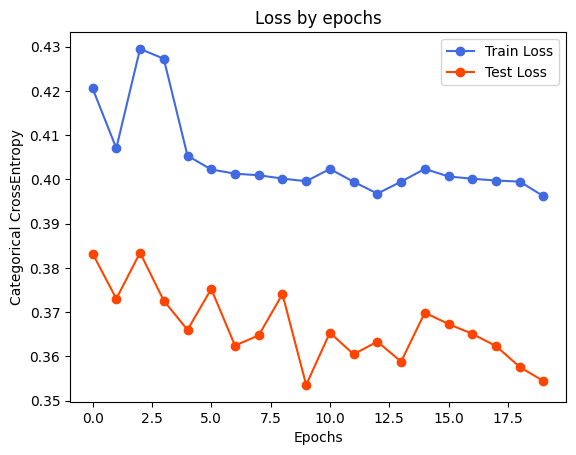

In [ ]:
# Loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(train_loss, label='Train Loss', color='royalblue', marker='o')
plt.plot(test_loss, label='Test Loss', color='orangered', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Categorical CrossEntropy')
plt.legend()
plt.title('Loss by epochs')

plt.show()

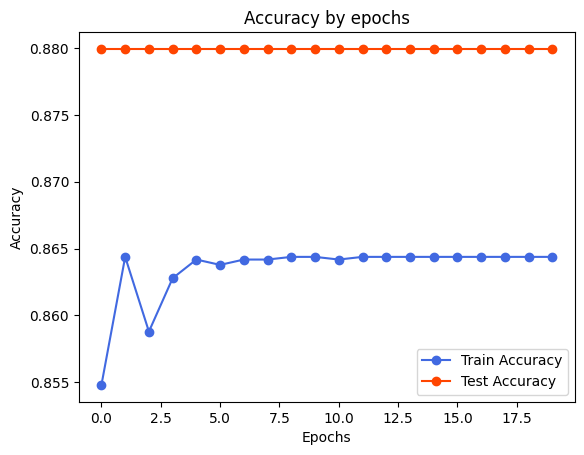

In [ ]:
# Accuracy
train_accuracy = history.history['categorical_accuracy']
test_accuracy = history.history['val_categorical_accuracy']

plt.plot(train_accuracy, label='Train Accuracy', color='royalblue', marker = 'o')
plt.plot(test_accuracy, label='Test Accuracy', color='orangered', marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy by epochs')

plt.show()

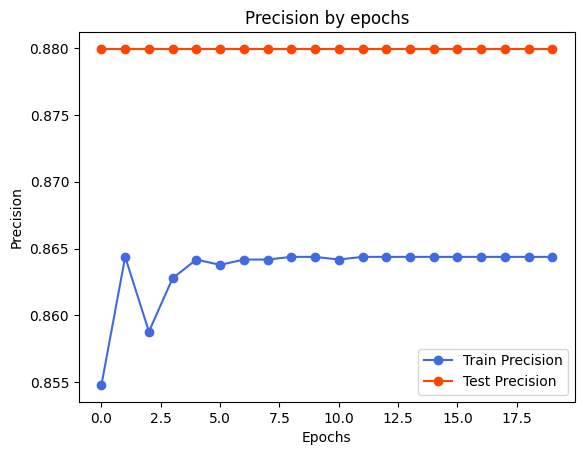

In [ ]:
# Precision
train_precision = history.history['precision_3']
test_precision = history.history['val_precision_3']

plt.plot(train_accuracy, label='Train Precision', color='royalblue', marker = 'o')
plt.plot(test_accuracy, label='Test Precision', color='orangered', marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision by epochs')

plt.show()

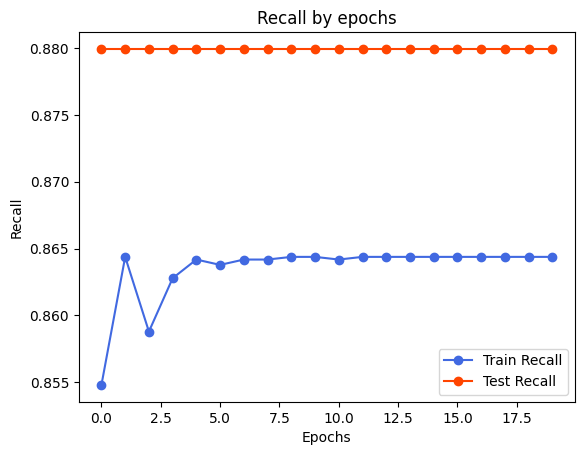

In [ ]:
# Recall
train_recall = history.history['recall_3']
test_recall = history.history['val_recall_3']

plt.plot(train_recall, label='Train Recall', color='royalblue', marker='o')
plt.plot(test_recall, label='Test Recall', color='orangered', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall by epochs')

plt.show()

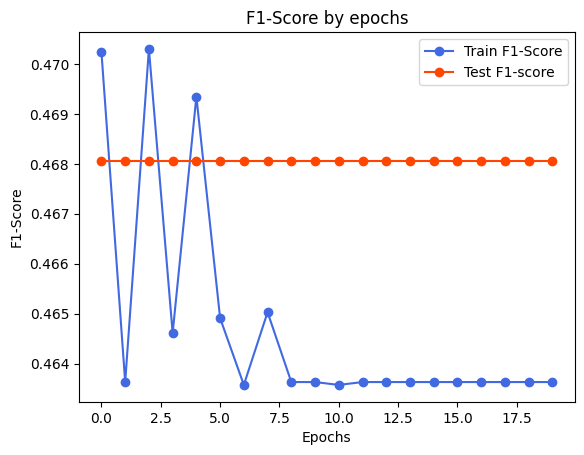

In [ ]:
# F1-Score
train_f1_score = np.mean(history.history['f1_score'], axis=1)
test_f1_score = np.mean(history.history['val_f1_score'], axis=1)

plt.plot(train_f1_score, label='Train F1-Score', color='royalblue', marker='o')
plt.plot(test_f1_score, label='Test F1-score', color='orangered', marker='o')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.legend()
plt.title('F1-Score by epochs')

plt.show()

In [ ]:
# Thử nghiệm với mô hình đã huấn luyện
mymodel = load_model('/content/drive/MyDrive/SpamEmailClassification/results/models/email-bilstm.h5')
predictions = mymodel.predict(x_valid)
count=0
for i in range(len(x_valid)):
  predicted = np.argmax(predictions[i])
  print("Predict: ",predicted,"| Actual: ",y_valid.iloc[i])
  if predicted==y_valid.iloc[i]:
    print('----> True')
    count+=1
  else:
    print('----> False')

  if predicted == 0:
    print('Đây là email rác!\n-----------------------')
  else:
    print('Đây là email quan trọng!\n-----------------------')

print("Tỉ lệ đúng: ",count,"/",len(x_valid),"=",count/len(x_valid)*100,"%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 424ms/step
Predict:  1 | Actual:  1
----> True
Đây là email quan trọng!
-----------------------
Predict:  1 | Actual:  1
----> True
Đây là email quan trọng!
-----------------------
Predict:  1 | Actual:  1
----> True
Đây là email quan trọng!
-----------------------
Predict:  1 | Actual:  0
----> False
Đây là email quan trọng!
-----------------------
Predict:  1 | Actual:  1
----> True
Đây là email quan trọng!
-----------------------
Predict:  1 | Actual:  1
----> True
Đây là email quan trọng!
-----------------------
Predict:  1 | Actual:  1
----> True
Đây là email quan trọng!
-----------------------
Predict:  1 | Actual:  1
----> True
Đây là email quan trọng!
-----------------------
Predict:  1 | Actual:  1
----> True
Đây là email quan trọng!
-----------------------
Predict:  1 | Actual:  1
----> True
Đây là email quan trọng!
-----------------------
Predict:  1 | Actual:  1
----> True
Đây là email quan trọng!
-----------------------
Predict:  1 | Actual:  